# K-Nearest Neighbours Classifier

The K-Nearest Neighbours (KNN) Classifier is one of the simplest and easy-to-intrepret classification algorithms in machine learning. For any new data point, it looks at the nearest `k` number of training examples or *neighbors*, and decides the predicted class based on majority class of neighbouring points. Let us see an example.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import sys
sys.path.append('../resources')
from plot_utils import plot_decision_boundary
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams['figure.figsize'] = 8, 6
plt.style.use('ggplot')

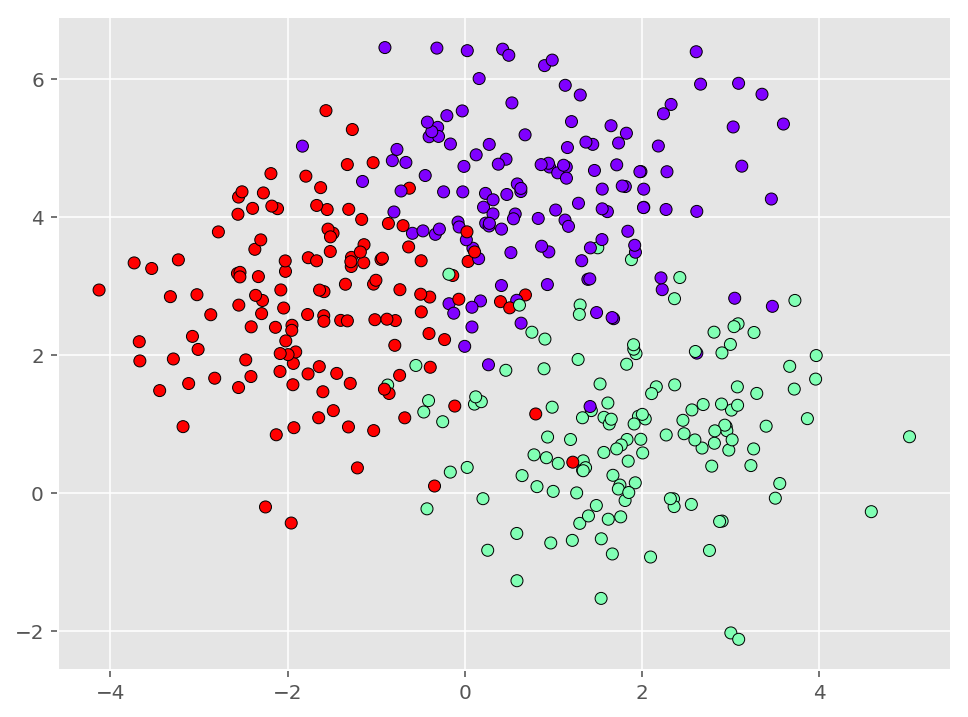

In [3]:
X, y = make_blobs(n_samples=400, centers=3, random_state=0, cluster_std=1.1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolors='k')

In [4]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

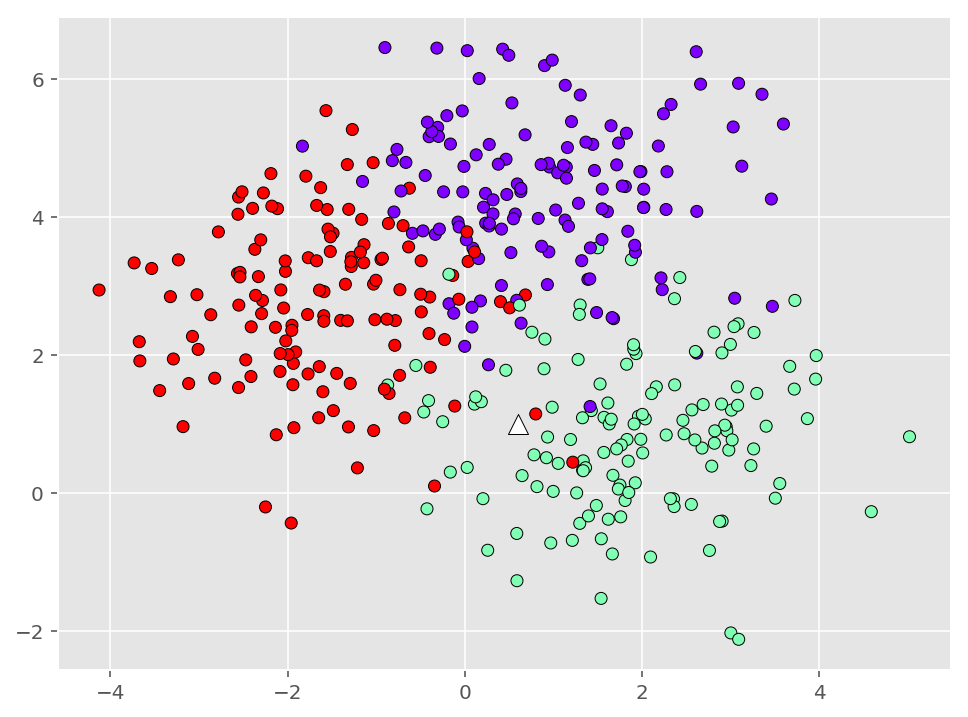

In [5]:
new_pt = np.array([[0.6, 1]])  # point to classify
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolors='k')
plt.scatter(new_pt[:,0], new_pt[:,1], c='white', marker='^', s=100, edgecolors='k')

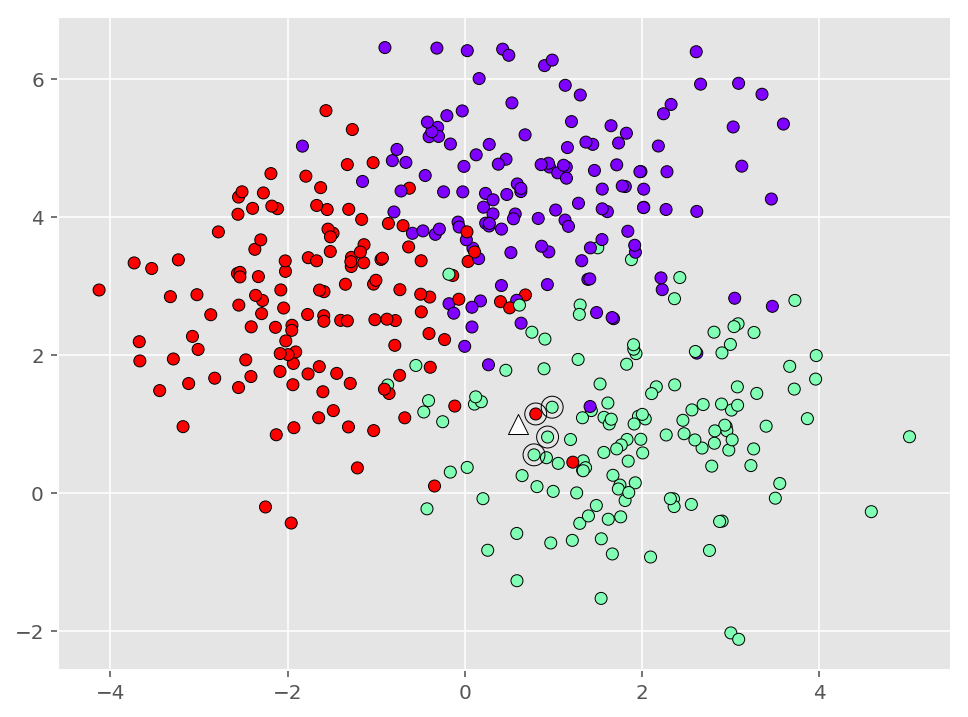

In [6]:
# find the neighbors
neighbors_indx = knn.kneighbors(new_pt, n_neighbors=4, return_distance=False)
neighbors = X[neighbors_indx[0]]
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolors='k')
plt.scatter(new_pt[:,0], new_pt[:,1], c='white', marker='^', s=100, edgecolors='k')
plt.scatter(neighbors[:,0], neighbors[:,1], c='None', s=120, edgecolors='k')

In [7]:
knn.predict(new_pt)  # 0=blue, 1=green, 2=red

array([1])

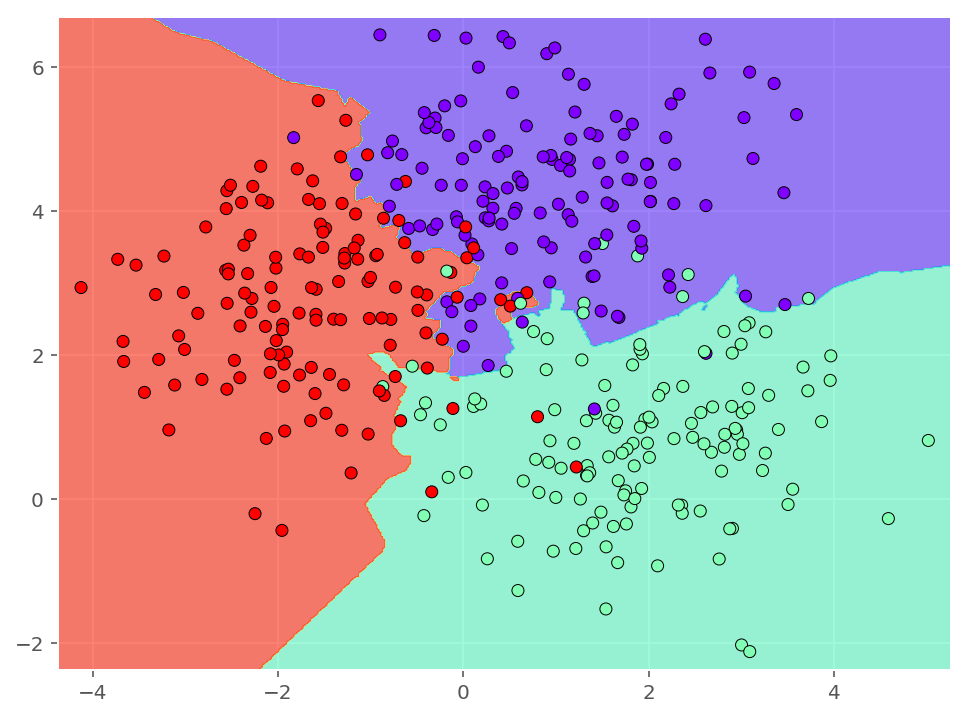

In [8]:
plot_decision_boundary(X, y, knn)

## Digit Recognition
Now let us see an example of *digit recognition* using KNN classifier.

In [9]:
mnist = pd.read_csv('../resources/mnist.csv')
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


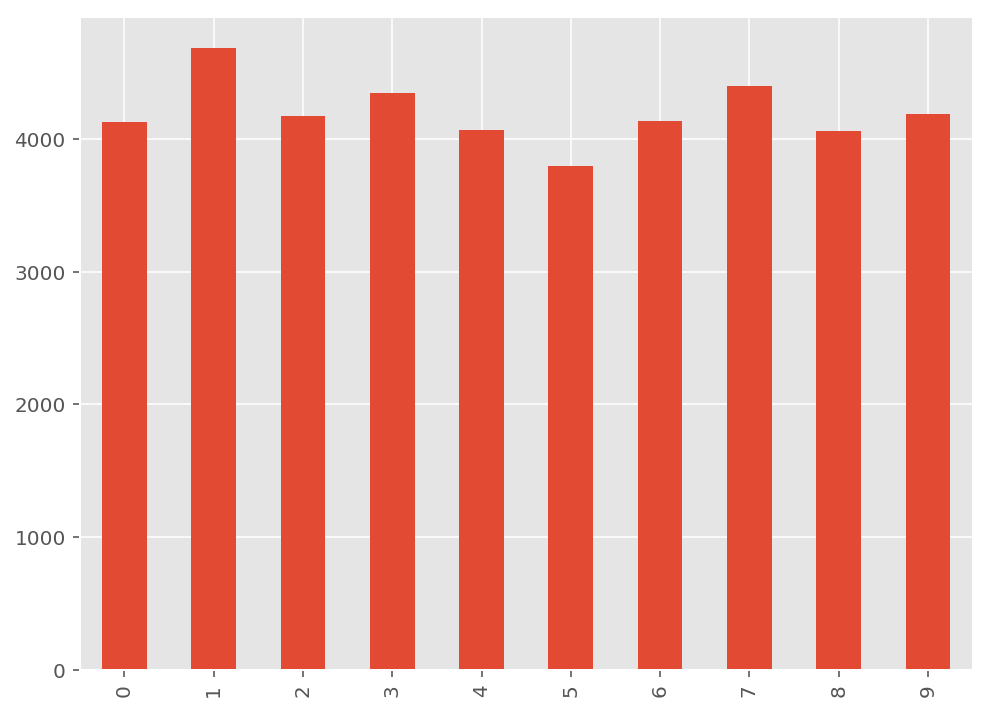

In [11]:
mnist['label'].value_counts(sort=False).plot.bar()

In [13]:
X = mnist.drop('label', axis=1).values
y = mnist['label'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.7, random_state=0)

7

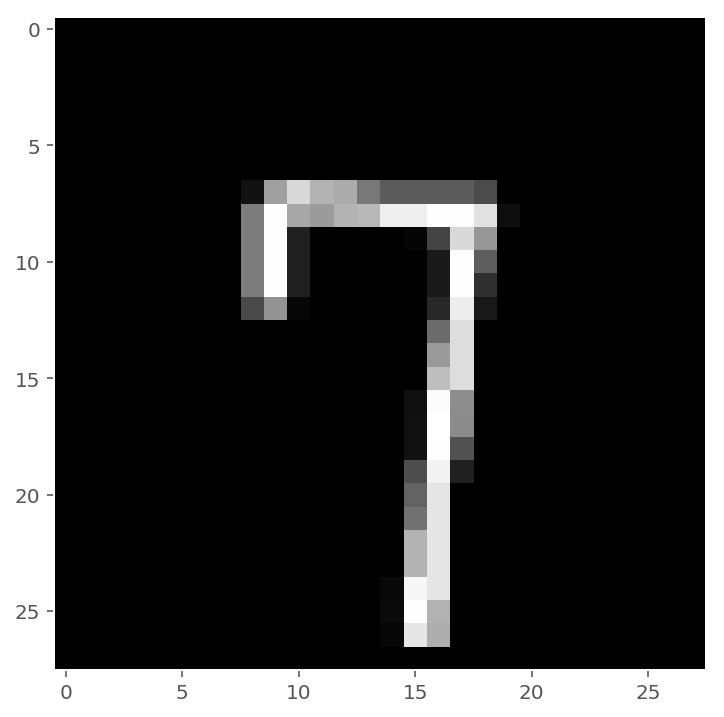

In [22]:
ind = 50
plt.imshow(X[ind].reshape(28,28), cmap='gray')
plt.grid()
y[ind]

In [23]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

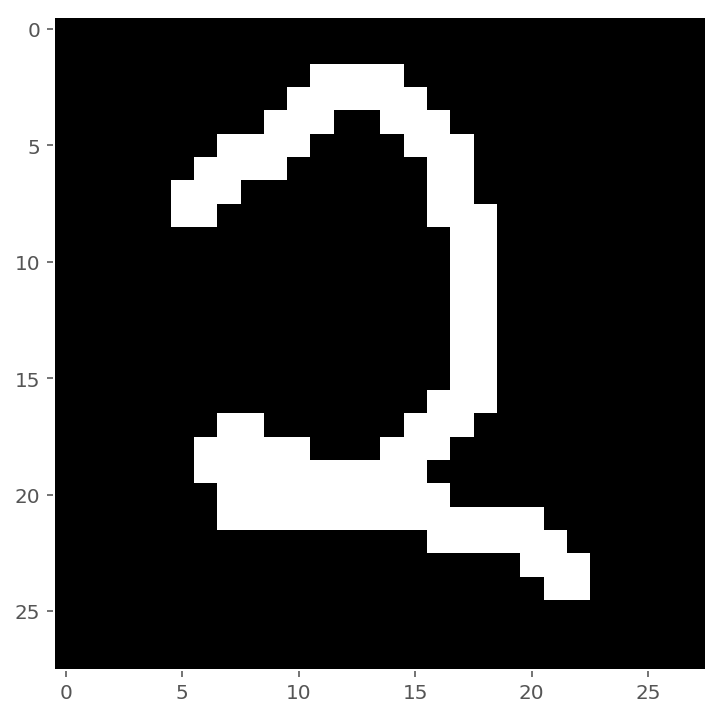

In [28]:
test = plt.imread('../resources/test.tif')[:,:,0]
plt.imshow(test, cmap='gray')
plt.grid()

In [29]:
model.predict(test.reshape(1, -1))

array([2])

# Miscellaneous Topics

## Cross Validation
Throughout all our tasks, we have been splitting our data into two sets, *train set* and *test set* by using `train_test_split` from scikit-learn. But as you may have realized, we're losing some part of our valuable data by doing so and thus less data is available for training our model. This problem is more severe if we have less initial training data. One way to tackle this problem is by using *cross-validation*.

In cross-validation, we split the data into `k` number of parts. Then, we use `k-1` splits as *training set* and `1` split as *validation set*, and repeat this process `k` times by choosing a different split each time. This means that we train `k` different models and average their accuracy (or any other metric) to get the final score of the model on the dataset. This method is known as **k-fold cross validation**.

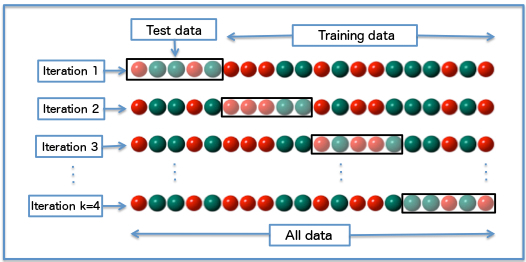

In [30]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg')

In [31]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
X = iris.drop('species', axis=1)
labels = {'setosa':0, 'versicolor':1, 'virginica':2}
y= iris['species'].map(labels)

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model = SVC(kernel='linear', C=1)
accuracy = cross_val_score(model, X, y, cv=4)
accuracy

array([1.        , 0.97435897, 0.97222222, 0.97222222])

In [34]:
accuracy.mean()

0.9797008547008548

## Model Evaluation Metrics
Until now, we have mostly focused on *accuracy* as the model performance evaluation metric. But depending upon the problem, accuracy might not always be the best way to evaluate the model performance. We'll see other metrics with reference to binary classification problem.

Text(111.12, 0.5, 'Actual Class')

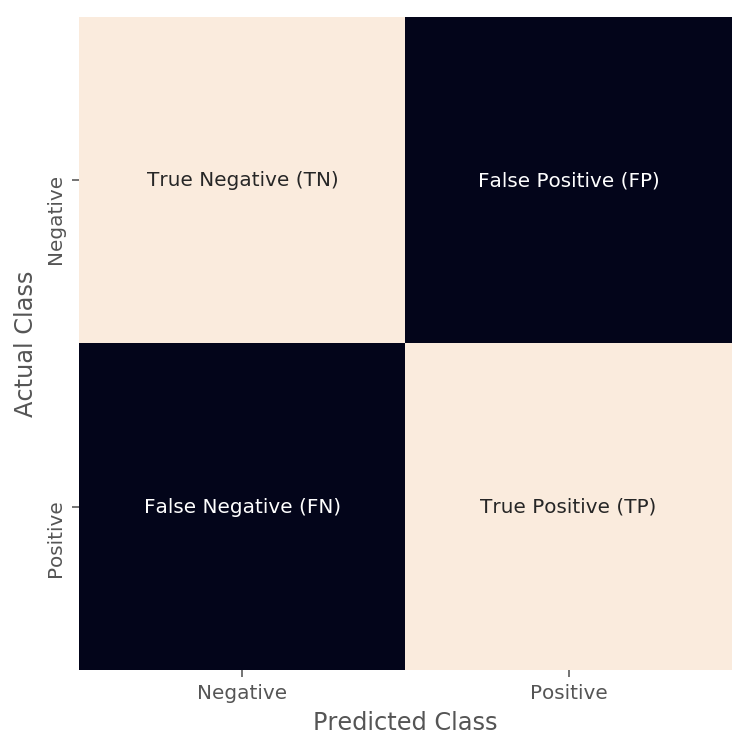

In [35]:
val = np.array([[100, 0], [0, 100]])
text = np.array([['True Negative (TN)', 'False Positive (FP)'],['False Negative (FN)', 'True Positive (TP)']])
classes = ['Negative', 'Positive']
sns.heatmap(val, annot=text, fmt='', cbar=False, square=True, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

$\text{Accuracy}=\large\frac{TP+TN}{TP+TN+FP+FN}$

$\text{Precision}=\large\frac{TP}{TP+FP}$

$\text{Recall}=\large\frac{TP}{TP+FN}$

$\text{F1-Score}=2*\large\frac{Precision*Recall}{Precision+Recall}$

Intituitively, precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to detect all the positive samples.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      0.96      0.98        50
   virginica       0.96      1.00      0.98        50

   micro avg       0.99      0.99      0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



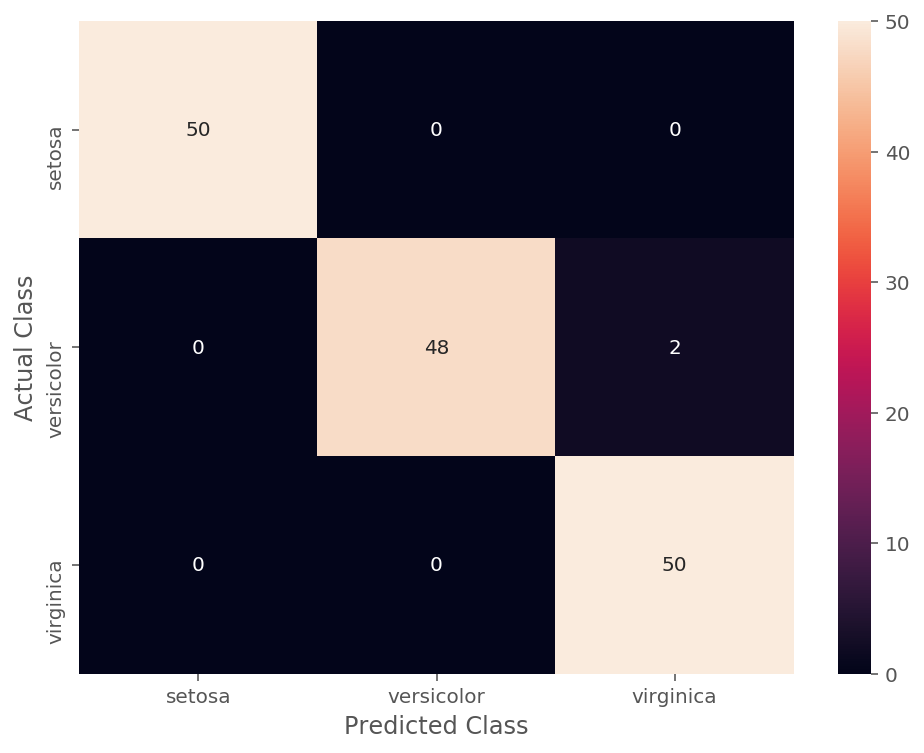

In [36]:
clf = SVC(kernel='rbf', C=1).fit(X, y)
y_pred = clf.predict(X)
print(classification_report(y, clf.predict(X), target_names=list(labels)))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Grid Search
We discussed that we need to specify *hyperparameters* on various models before training, and we often experiment with multiple values of these *hyperparameters* to build multiple models and find out their best values by evaluating the model performance score using cross validation. This is quite a tedious task, and *Grid Search* helps us make this task easy.

Grid Search makes a grid containing every combination of hyperparameters, trains one model for each combination, and evaluates all of them to find the best set of hyperparameters using cross validation. Let us see an example.

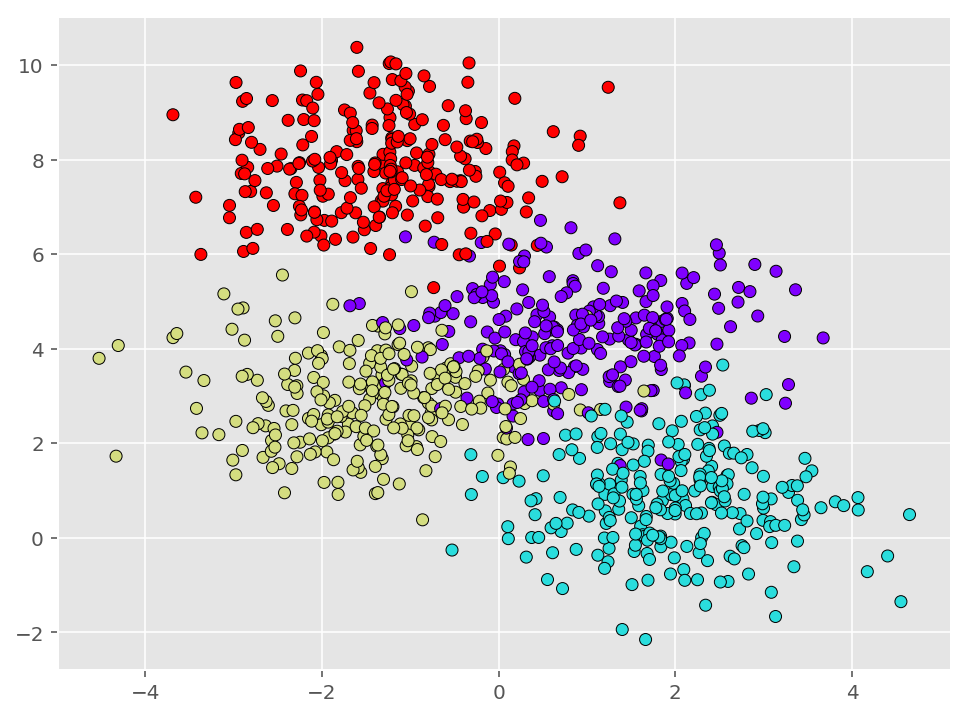

In [37]:
X, y = make_blobs(n_samples=1000, centers=4, random_state=0, cluster_std=1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolors='k')

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

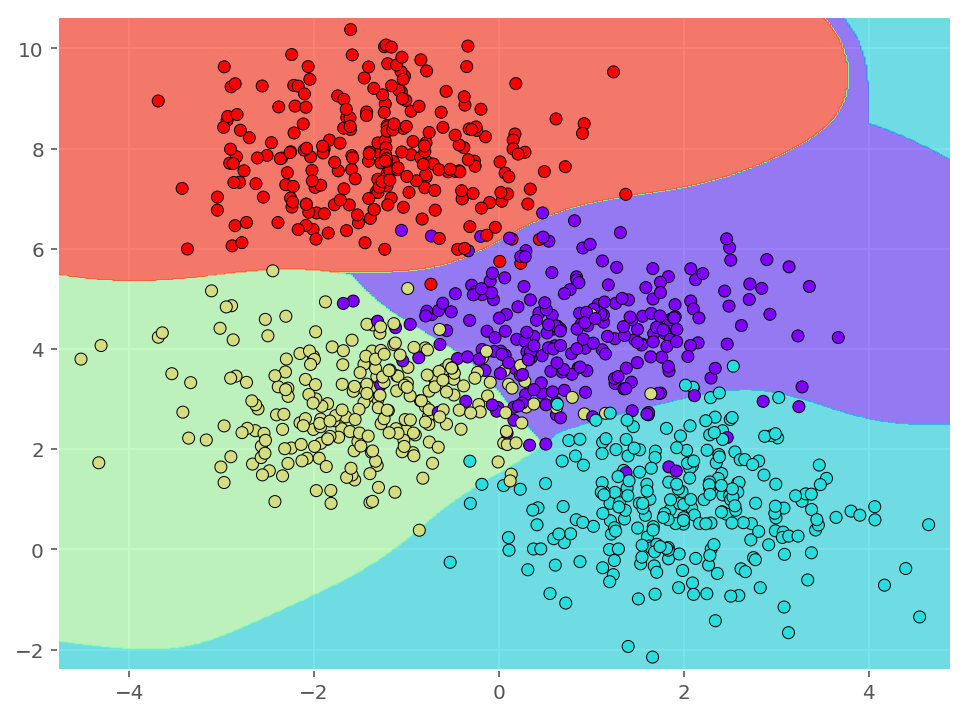

In [41]:
model = grid.best_estimator_
plot_decision_boundary(X, y, model)

# Project 4: Hyperparameter Tuning with GridSearchCV
Using Grid Search with *6-fold* Cross Validation to find the best kernel type among `linear` and `rbf` and best value of cost parameter `C` among `0.1`, `1`, `10`, `50`, `100`, build a Support Vector Machine classifier to predict survival of passengers on the titanic dataset.